# 🌊 Extracting Wave Height from Sentinel-3 Altimetry Data

This notebook demonstrates how to extract **significant wave height** from Sentinel-3 SRAL altimetry data over the **Mediterranean Sea** using Python.

## 📥 Step 1: Load Sentinel-3 NetCDF Data

We use the `netCDF4` library to read the NetCDF file containing Sentinel-3 SRAL data.

## 🌍 Step 2: Filter Data for the Mediterranean Region

We define the bounding box for the Mediterranean Sea and filter the data accordingly.

## 📊 Step 3: Visualize Wave Height Distribution

We plot a histogram and a scatter map of wave height values over the Mediterranean Sea.

In [83]:
# Load required libraries
from netCDF4 import Dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [113]:
# Replace with your file path
file_path = 'standard_measurement.nc'

# Open the NetCDF file
nc = Dataset(file_path, mode='r')

# Print all variable names
print("Variables:")
print(nc.variables.keys())

# Print dimensions
print("\nDimensions:")
print(nc.dimensions.keys())

# Print global attributes
print("\nGlobal Attributes:")
print(nc.ncattrs())


Variables:
dict_keys(['time_01', 'time_20_ku', 'time_20_c', 'UTC_day_01', 'UTC_sec_01', 'UTC_day_20_ku', 'UTC_sec_20_ku', 'UTC_day_20_c', 'UTC_sec_20_c', 'UTC_time_1hz_20_ku', 'UTC_time_1hz_20_c', 'lat_01', 'lon_01', 'lat_20_ku', 'lon_20_ku', 'lat_20_c', 'lon_20_c', 'lat_cor_20_ku', 'lon_cor_20_ku', 'lat_cor_20_c', 'lon_cor_20_c', 'surf_type_01', 'surf_type_20_ku', 'surf_type_20_c', 'surf_class_01', 'surf_class_20_ku', 'surf_class_20_c', 'rad_surf_type_01', 'angle_coast_01', 'angle_coast_20_ku', 'angle_coast_20_c', 'dist_coast_01', 'dist_coast_20_ku', 'dist_coast_20_c', 'alt_01', 'alt_20_ku', 'alt_20_c', 'orb_alt_rate_01', 'orb_alt_rate_20_ku', 'orb_alt_rate_20_c', 'agc_01_ku', 'agc_01_c', 'agc_01_plrm_ku', 'agc_numval_01_ku', 'agc_numval_01_c', 'agc_numval_01_plrm_ku', 'agc_rms_01_ku', 'agc_rms_01_c', 'agc_rms_01_plrm_ku', 'range_ocean_01_ku', 'range_ocean_01_c', 'range_ocean_01_plrm_ku', 'range_ocean_20_ku', 'range_ocean_20_c', 'range_ocean_20_plrm_ku', 'range_ocean_qual_01_ku', 'ran

In [115]:
# Print details of a specific variable
var_name = 'swh_ocean_01_ku'  # replace with one from your file
print(f"\nDetails of variable '{var_name}':")
print(nc.variables[var_name])


Details of variable 'swh_ocean_01_ku':
<class 'netCDF4.Variable'>
int16 swh_ocean_01_ku(time_01)
    _FillValue: 32767
    long_name: corrected 'ocean' significant waveheight : 1 Hz Ku band
    units: m
    standard_name: sea_surface_wave_significant_height
    quality_flag: quality_swh_ocean_01_ku
    add_offset: 0.0
    scale_factor: 0.001
    coordinates: lon_01 lat_01
    comment: LRM mode : ocean retracking, SAR mode : ocean/coastal retracking. Instrumental corrections included : modeled instrumental errors correction and system bias.
unlimited dimensions: 
current shape = (152,)
filling on


In [117]:
# Print details of a specific variable
var_name = 'lat_01'  # replace with one from your file
print(f"\nDetails of variable '{var_name}':")
print(nc.variables[var_name])


Details of variable 'lat_01':
<class 'netCDF4.Variable'>
int32 lat_01(time_01)
    long_name: latitude : 1 Hz
    units: degrees_north
    standard_name: latitude
    add_offset: 0.0
    scale_factor: 1e-06
    comment: Positive latitude is North latitude, negative latitude is South latitude
unlimited dimensions: 
current shape = (152,)
filling on, default _FillValue of -2147483647 used


In [119]:
# Print details of a specific variable
var_name = 'lon_01'  # replace with one from your file
print(f"\nDetails of variable '{var_name}':")
print(nc.variables[var_name])


Details of variable 'lon_01':
<class 'netCDF4.Variable'>
int32 lon_01(time_01)
    long_name: longitude : 1 Hz
    units: degrees_east
    standard_name: longitude
    add_offset: 0.0
    scale_factor: 1e-06
    comment: East longitude relative to Greenwich meridian
unlimited dimensions: 
current shape = (152,)
filling on, default _FillValue of -2147483647 used


In [121]:
# Extract variables
lat = nc.variables['lat_01'][:]
lon = nc.variables['lon_01'][:]
swh = nc.variables['swh_ocean_01_ku'][:]

# Close the NetCDF file
nc.close()

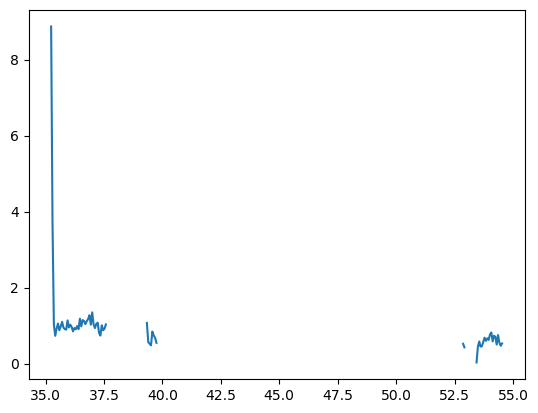

In [123]:
plt.plot(lat, swh)
# Show the plot
plt.show()

In [125]:
# Define bounding box
lat_min, lat_max = 35.0, 37.0

# Filter data within the region
mask = (lat >= lat_min) & (lat <= lat_max)
med_lat = lat[mask]
med_lon = lon[mask]
med_swh = swh[mask]

# Adjust lon values
med_lon_b = med_lon/1000

# Create a DataFrame
df = pd.DataFrame({'Latitude': med_lat, 'Longitude': med_lon_b, 'Wave_Height': med_swh})
df.head()

,Latitude,Longitude,Wave_Height
0,36.996252,0.359029,1.349
1,36.937715,0.359011,1.025
2,36.879176,0.358993,1.272
3,36.820635,0.358975,1.174
4,36.762091,0.358957,1.115


In [127]:
# How many datapoints do I have?
df.shape

(35, 3)

In [129]:
df

,Latitude,Longitude,Wave_Height
0,36.996252,0.359029,1.349
1,36.937715,0.359011,1.025
2,36.879176,0.358993,1.272
3,36.820635,0.358975,1.174
4,36.762091,0.358957,1.115
5,36.703545,0.358939,1.039
6,36.644997,0.358921,1.123
7,36.586447,0.358903,1.146
8,36.527895,0.358885,0.979
9,36.469340,0.358867,1.182


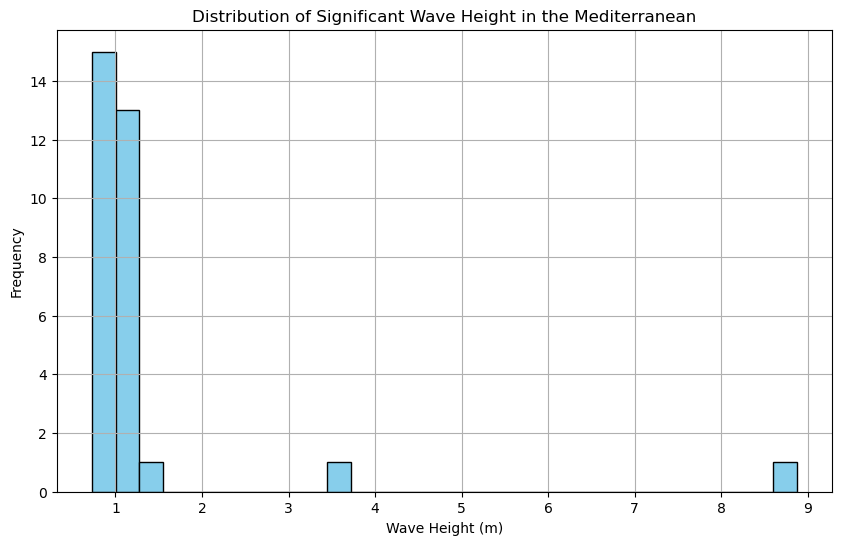

In [131]:
# Plot histogram of wave height
plt.figure(figsize=(10, 6))
plt.hist(df['Wave_Height'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Significant Wave Height in the Mediterranean')
plt.xlabel('Wave Height (m)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

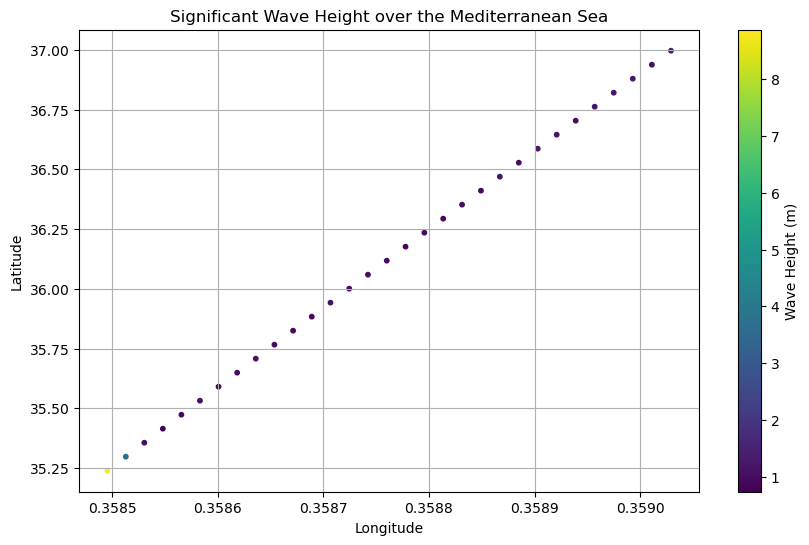

In [133]:
# Scatter plot of wave height over Mediterranean
plt.figure(figsize=(10, 6))
sc = plt.scatter(df['Longitude'], df['Latitude'], c=df['Wave_Height'], cmap='viridis', s=10)
plt.colorbar(sc, label='Wave Height (m)')
plt.title('Significant Wave Height over the Mediterranean Sea')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

In [135]:
import folium

# Define the region of interest using latitude and longitude bounds
# Example: Mediterranean Sea region
min_lat, max_lat = 35.0, 37.0
min_lon, max_lon = 0, 0.5

# Calculate the center of the region
center_lat = (min_lat + max_lat) / 2
center_lon = (min_lon + max_lon) / 2

# Create a folium map centered on the region of interest
m = folium.Map(location=[center_lat, center_lon], zoom_start=5)


# Add circle markers for each point in the DataFrame
for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=f"Wave Height: {row['Wave_Height']} m"
    ).add_to(m)
m
